# Problem Statment:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of Database:

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# 1. Importing all Required libraries

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

import warnings 
warnings.filterwarnings('ignore')

# 2. Loading Dataset 

In [2]:
# calling the dataset 

df = pd.read_csv("Global.csv")
pd.set_option('display.max_columns',None) # for display the whole columns
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
# looking out the columns

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
# getting the shape

df.shape

(907, 27)

# 3. Data Analysis

In [5]:
# getting the full str. information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

observation = Here , we are getting from the Data information data having 907 columns and 27 rows
              and , out of 27 15 columns having float values , and 12 is having obj values
              and also some data having null values..
              so, firstlly we will check the null values 
          

# 4. Finding the Null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

observation = Here we can see most of the data having so much null vavlues 
              in some columns.
              latitude and longitude have 46 missing number of null values, and other fuel1, fuel2, fuel3, have 
              the great number of missing values
              wap_id is completly missing
              we wil comfirm more with the help of heatmap
              

<AxesSubplot:>

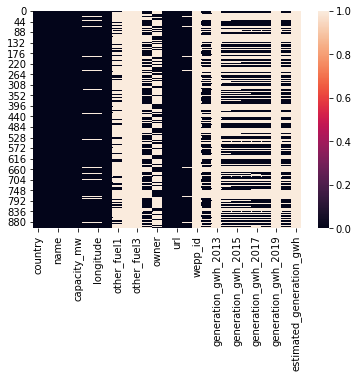

In [7]:
# heatmap , to get more confirmation of null  values

sns.heatmap(df.isnull())

observation = here we have got null values data woth the help of heatmap

In [8]:
# Dropping the data

df.drop(['country', 'country_long'], inplace=True, axis = 1)

here we dropped the country and country long columns , beacues it is having only obj data
that will not any effect on dataset 

In [9]:
# Dropping the columns which is having larger null values

df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019'], inplace = True, axis = 1)

In [10]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [11]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(),inplace=True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(),inplace=True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(),inplace=True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(),inplace=True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(),inplace=True)
df['latitude'].fillna(value=df['latitude'].median(),inplace=True)
df['longitude'].fillna(value=df['longitude'].median(),inplace=True)

In [12]:
# now recheck the null values after droping

df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# 5. EDA

# Univariate analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

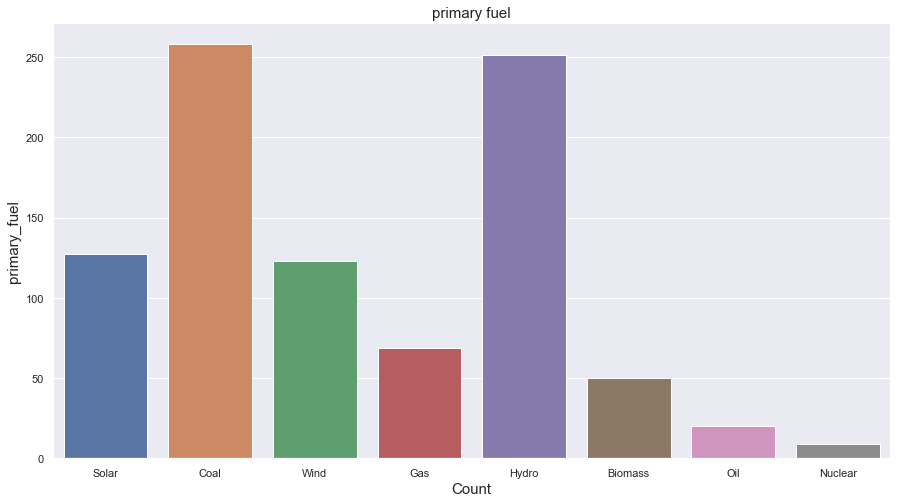

In [13]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'])
plt.xlabel('Count',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title("primary fuel",fontsize=15)

df['primary_fuel'].value_counts()

observation = here we can see the power plant are using coal and hydro as thye primary fuel.

coal having maximum counts , which indicates mosty of the power generation plant coal using primary fuel

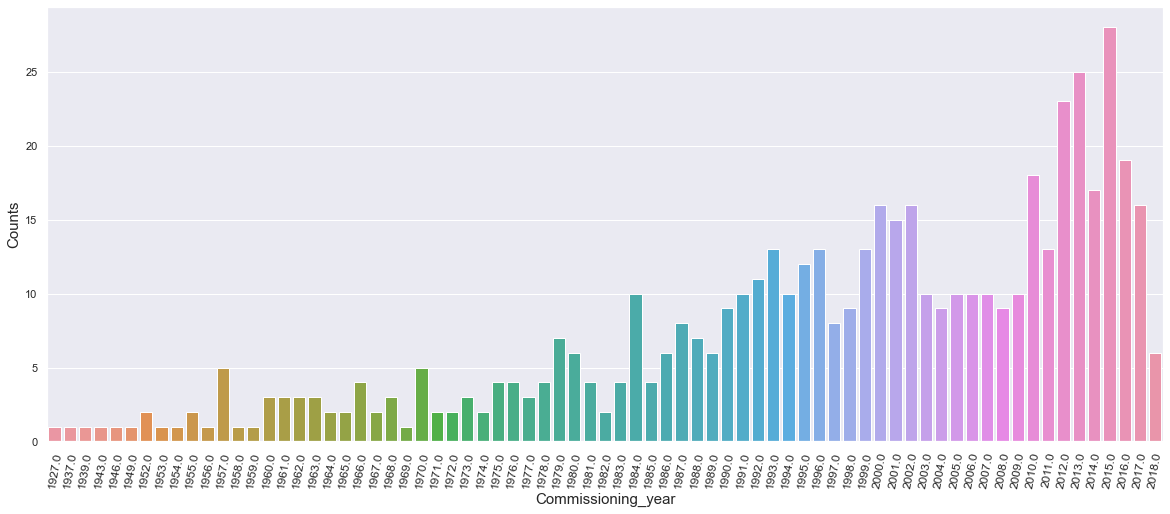

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()


# observation = here we can see first power plant in india starts in 1927
              the counts is low in 1956
              we developed into 1957 to 1983 
              the number increase 1964 with the total counts of 10
              in the year 2013 we have maximum number of power plant , the count is more than 25

In [15]:
df['owner'].value_counts()

Jk Cement ltd                          4
Sterling Agro Industries ltd.          4
Acc Acc ltd                            4
Shri Ssk ltd                           3
Shree Sugars ltd                       3
                                      ..
Mukesh Gupta group                     1
Clover Solar Private Limited (CSPL)    1
Uttam Steels ltd                       1
Solar Paces                            1
Tadas Wind Energy                      1
Name: owner, Length: 280, dtype: int64

observation = we can see the ACC lTd, jk cement LTD, and sterling having maximu number of power plants.
              ujjas energy having 3 power plant.
              other having 2 or only single power plant.

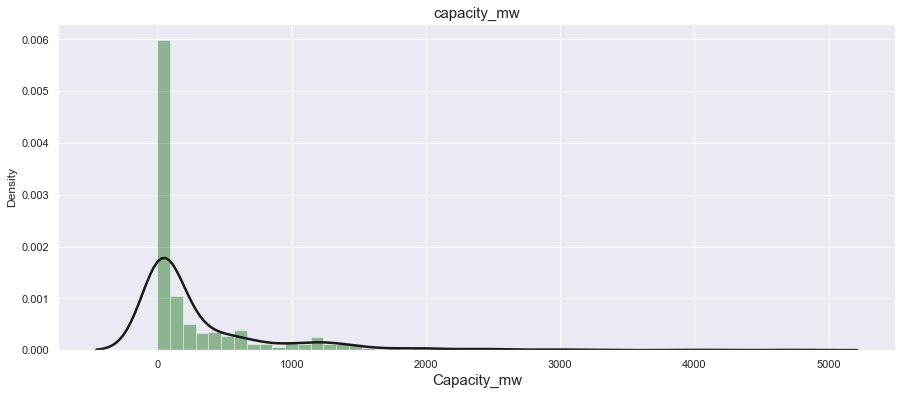

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(df['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()


observation = Here we can see the probablity of capacity greater than 1000 is less.
Data is not normaly distributed.
Data having outliers.

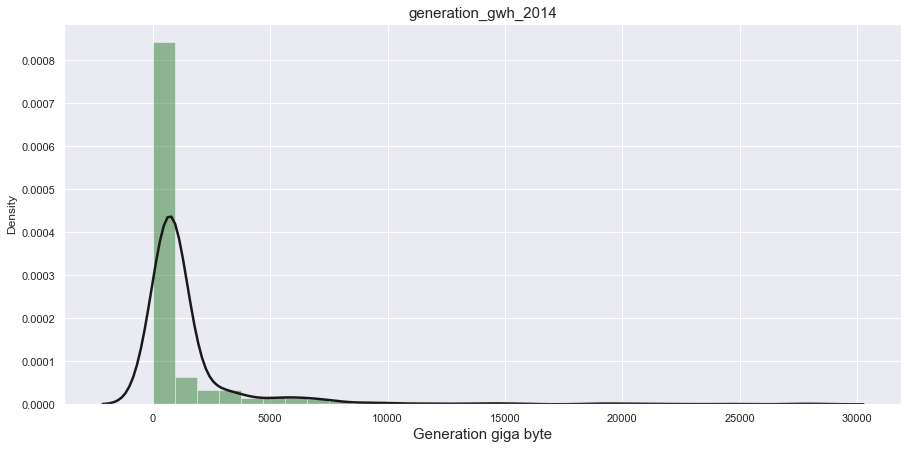

In [17]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

 observation = it is also having sweknwss

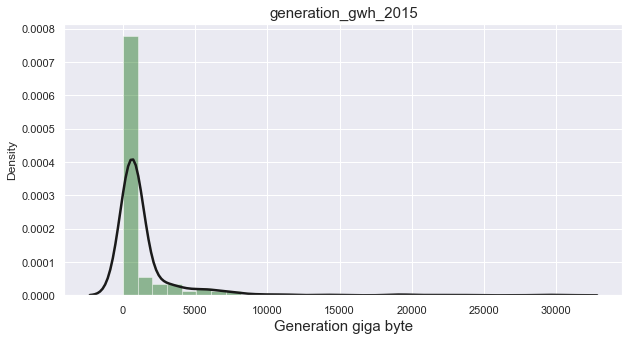

In [18]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

it is also having skewness

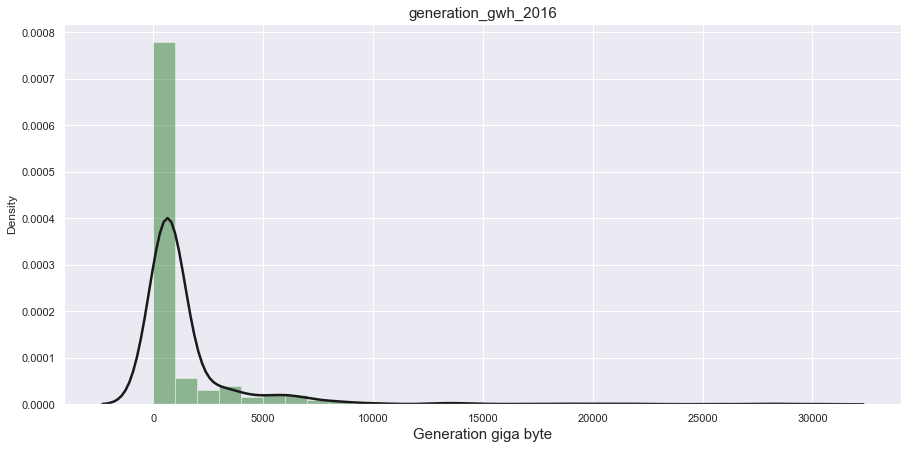

In [19]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

it is also having skewness

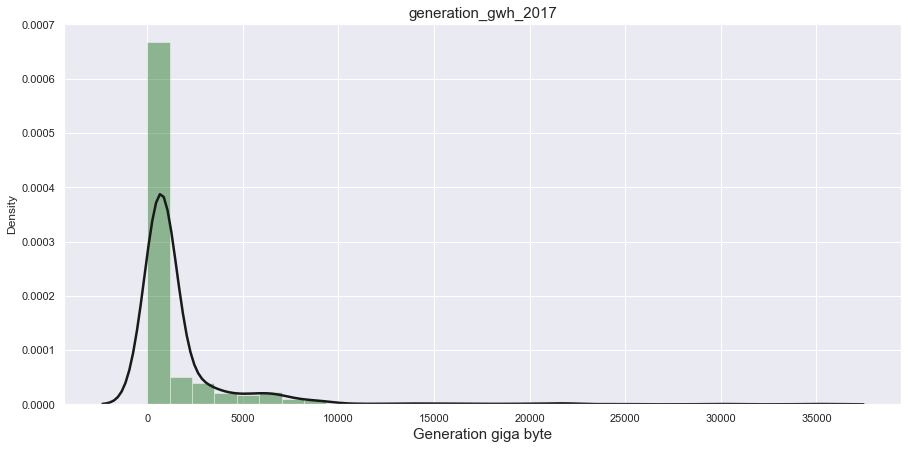

In [20]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

it is also havig skewness

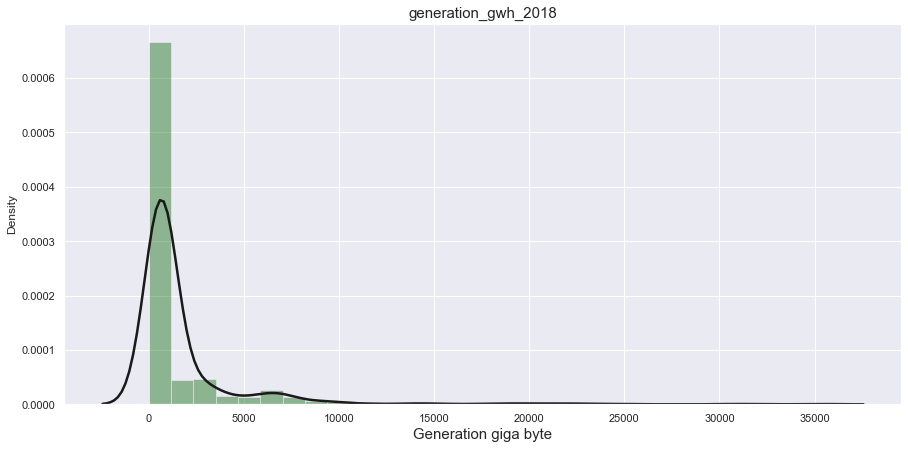

In [21]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2018'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

it is also having skewness

# 6. Bivariate Analysis

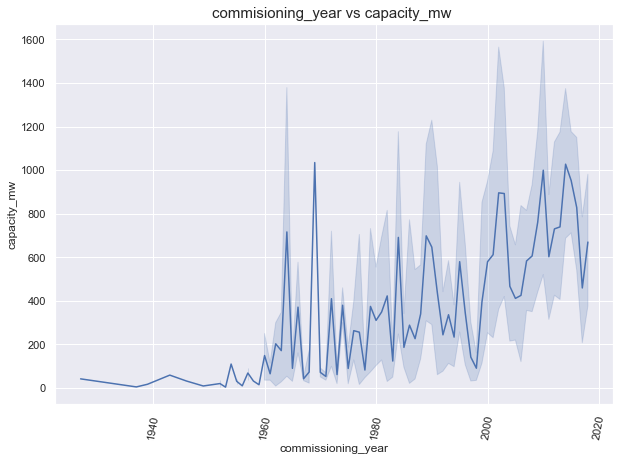

In [25]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commisioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

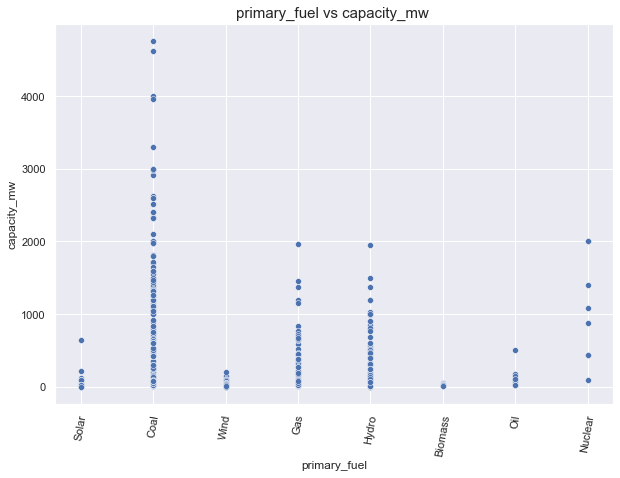

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

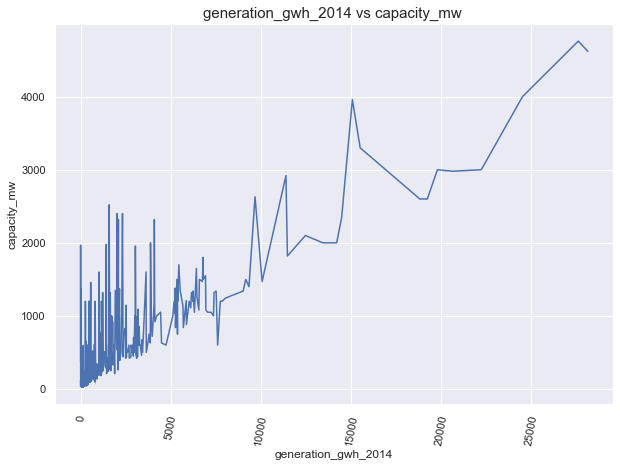

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

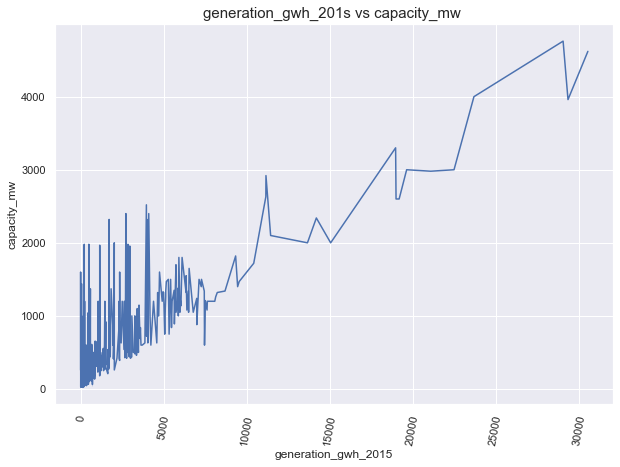

In [29]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_201s vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

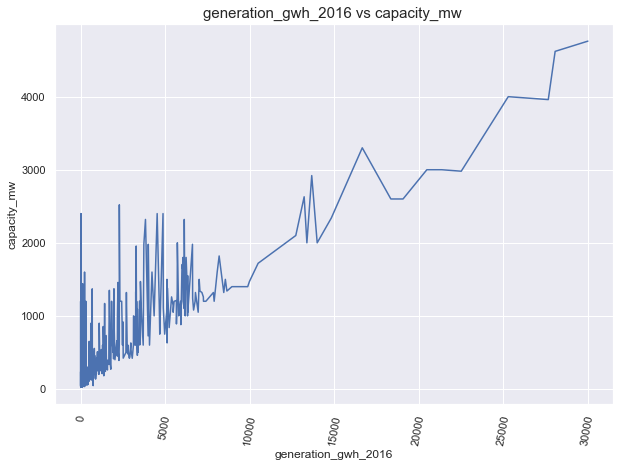

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

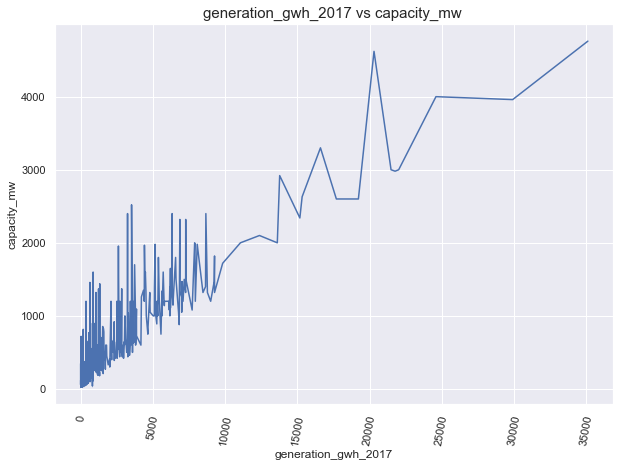

In [31]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

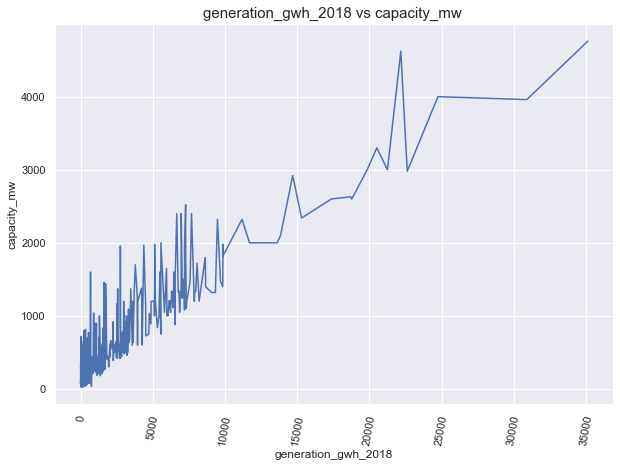

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2018',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

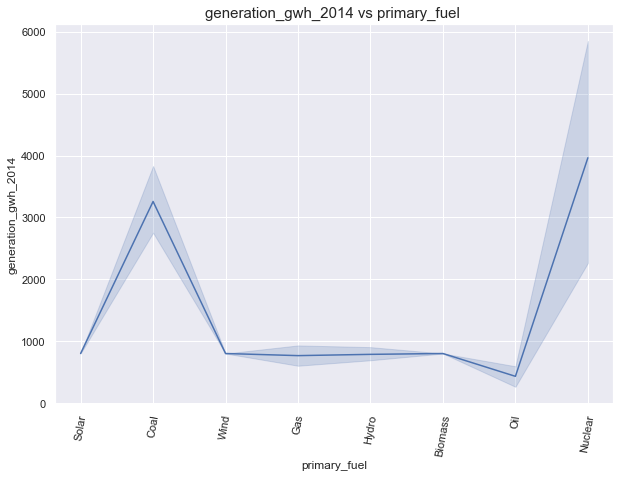

In [33]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs primary_fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

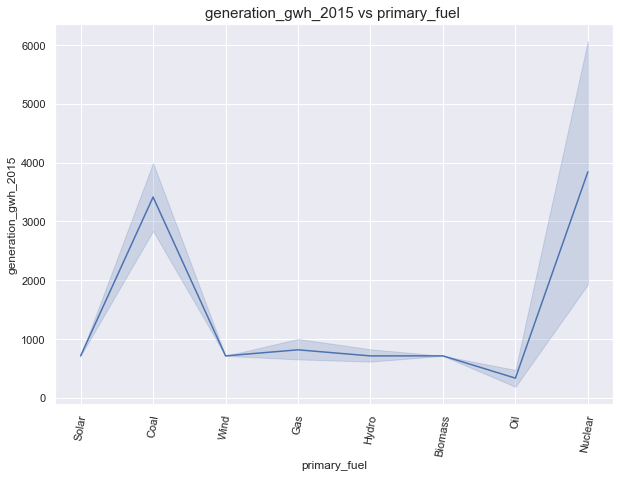

In [34]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs primary_fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

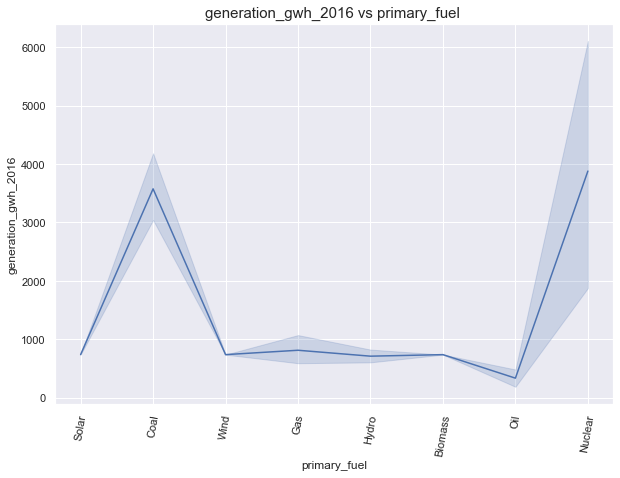

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs primary_fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

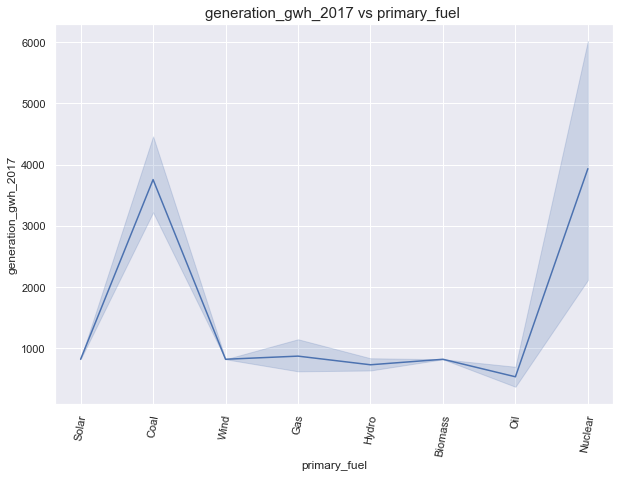

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs primary_fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

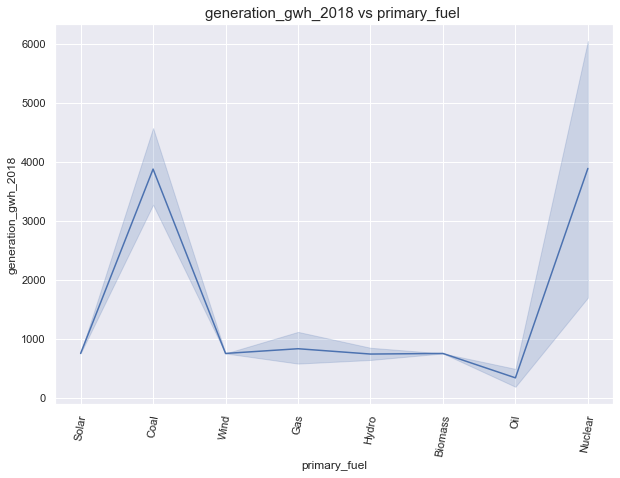

In [37]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2018')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs primary_fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [38]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# 7. Multivariate Analysis

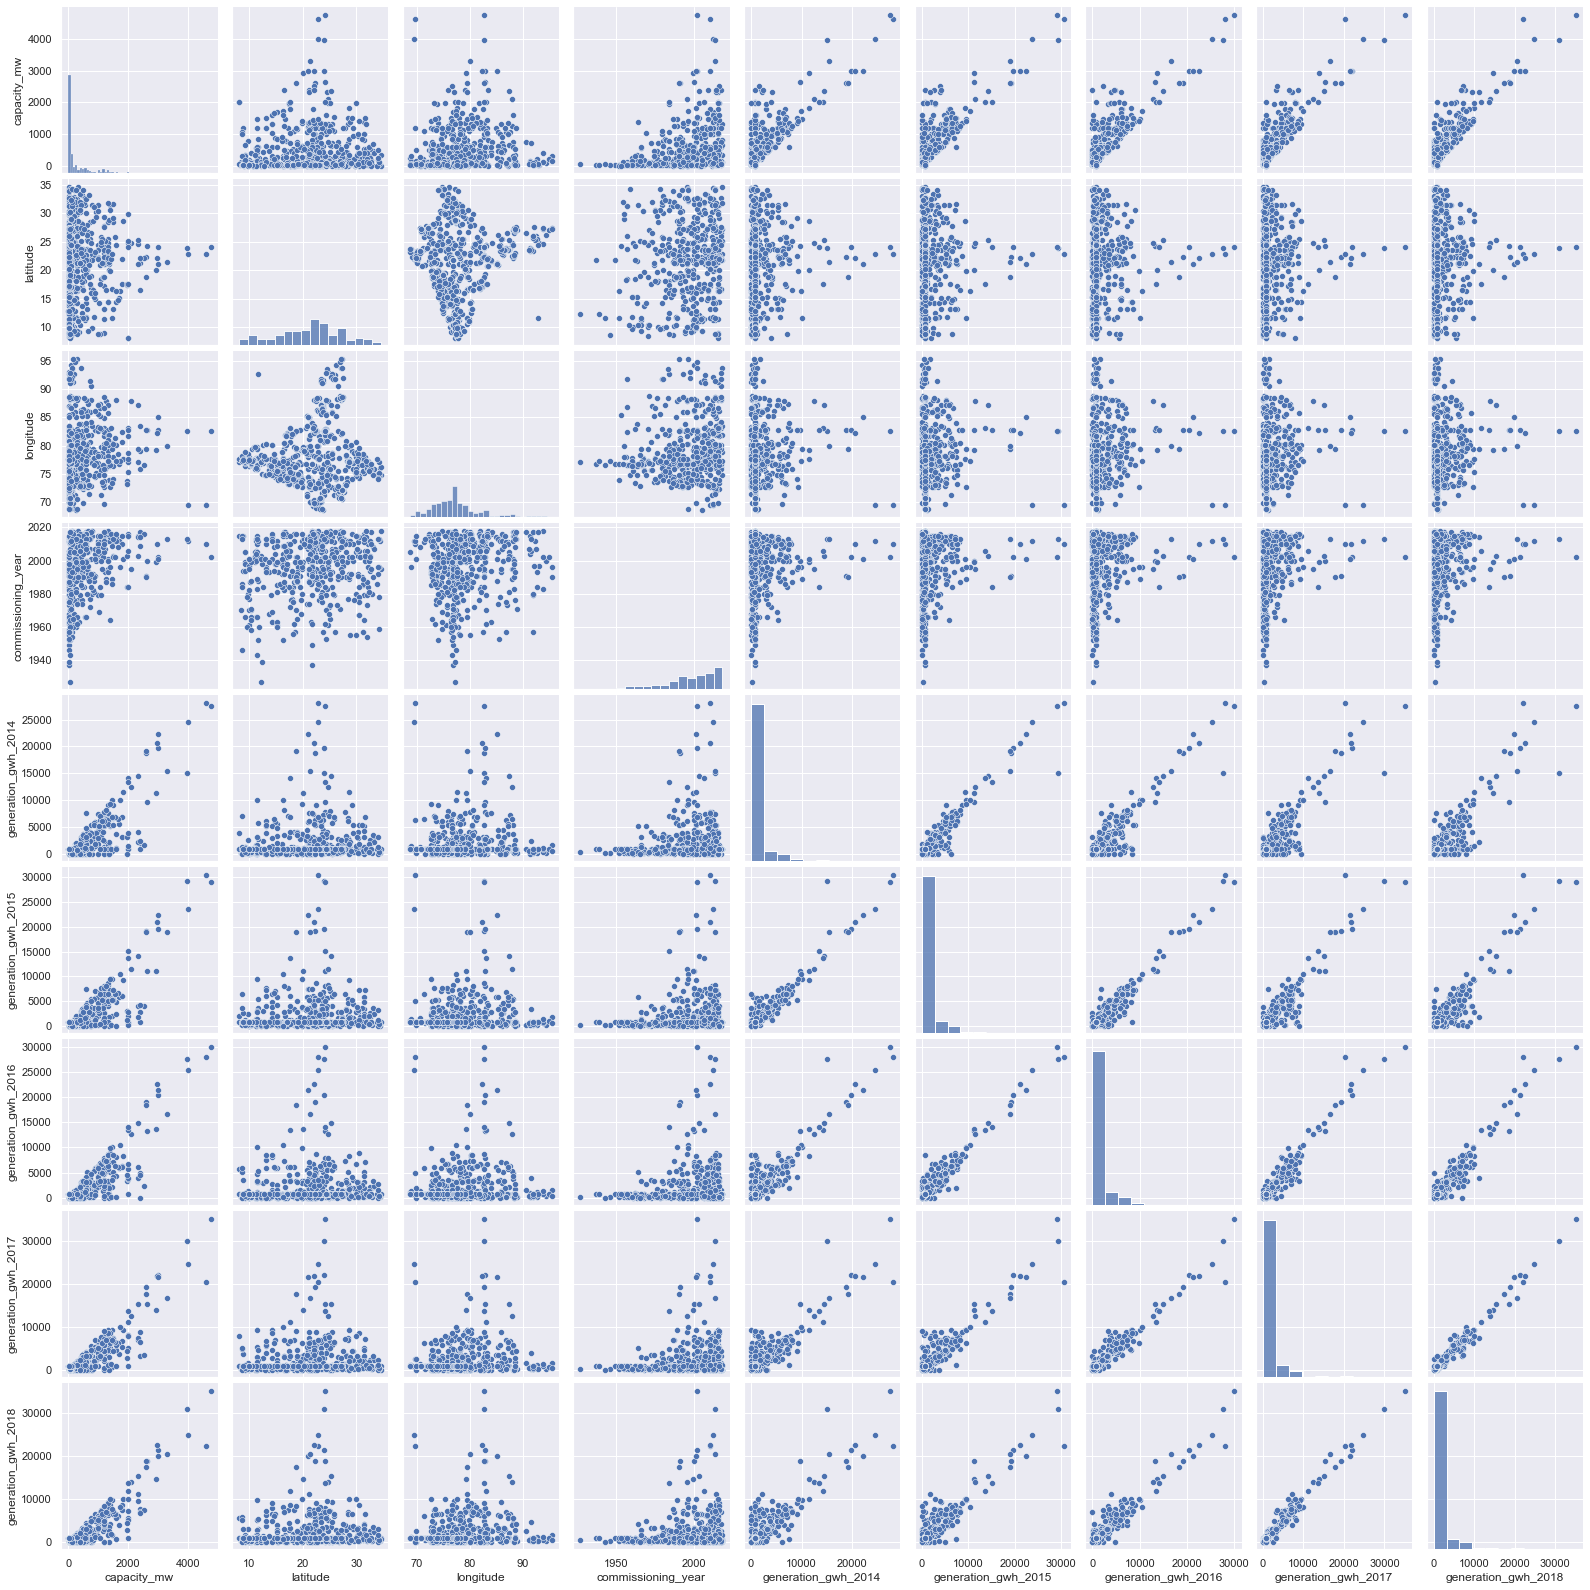

In [39]:
sns.pairplot(df)

# EDA Summary
capacity_mw: we can see capacity is mostly dependent on Coal.
latitude & longitude : They are not playing very good role in capacity_mw.
primary_fuel: Mostly Coal is used as primary fuel.
commissioning_year: we can see capacity incerases after 2000.
generation_gwh_2013-2017: we can see generation growth is almost same for each year

In [41]:
df.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

observation = here we dropped the columns because they are not playing goood role.

In [73]:
# rechecking the columns after droopintg the  columns 

df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [43]:
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.048790,0.199299,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.048790,1.000000,0.035619,0.057179,0.052422,0.046267,0.056407,0.053700
longitude,0.199299,0.035619,1.000000,0.106855,0.123763,0.145640,0.154014,0.157405
generation_gwh_2014,0.793497,0.057179,0.106855,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.052422,0.123763,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.046267,0.145640,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.056407,0.154014,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.053700,0.157405,0.895143,0.933161,0.964988,0.986685,1.000000


<AxesSubplot:>

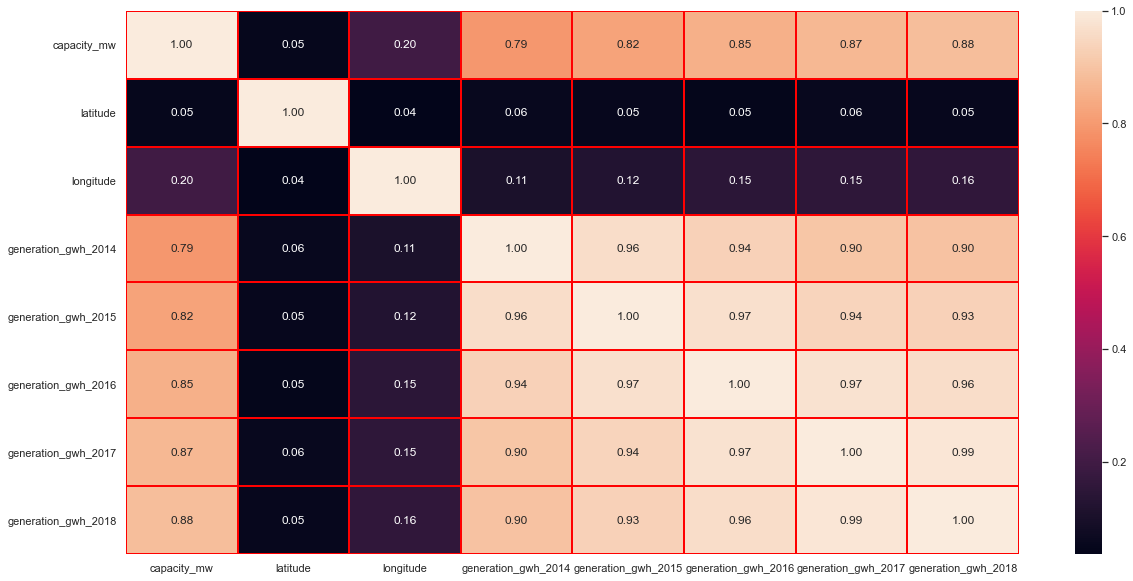

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True,linewidths=1,linecolor = 'red',fmt='.2f')

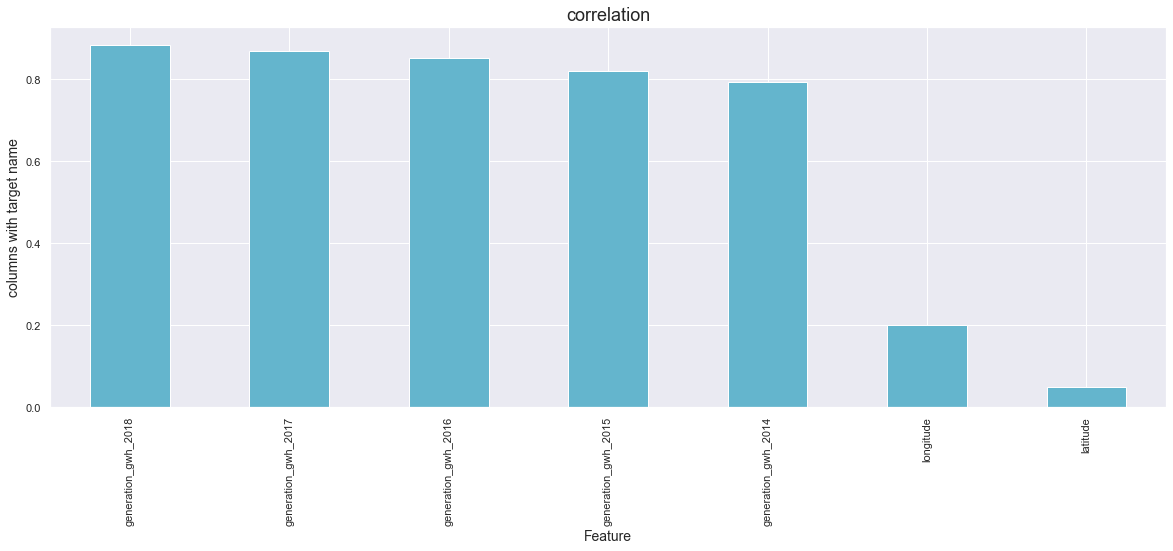

In [47]:
plt.figure(figsize= (20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target name', fontsize = 14)
plt.title('correlation',fontsize=18)
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #initlize LabelEncoder

In [79]:
from sklearn.preprocessing import OrdinalEncoder
emc = OrdinalEncoder()
df['primary_fuel'] = emc.fit_transform(df['primary_fuel'].values.reshape(-1,1))

In [80]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


 obseravtion = herw we are getting primary fuel is -ve corelate with capacity megawatt.
    and other parameters is also having +ve correlated.
    and generation growth columns is having highly correlated 

# 8. Checking Outliers

<AxesSubplot:>

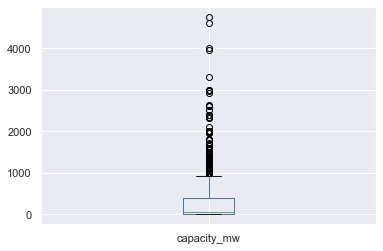

In [57]:
#we are creating plot box to check outliers

df["capacity_mw"].plot.box()

<AxesSubplot:>

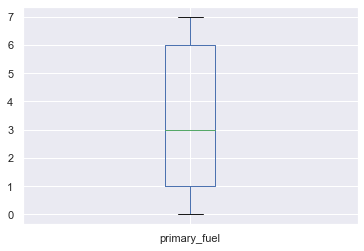

In [81]:
df["primary_fuel"].plot.box()

<AxesSubplot:>

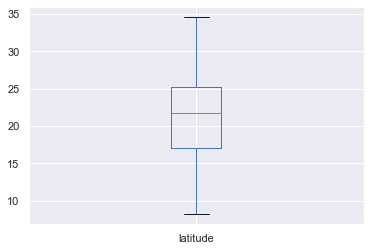

In [51]:
df["latitude"].plot.box()

<AxesSubplot:>

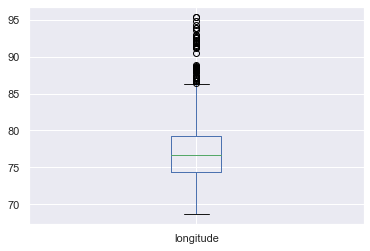

In [52]:
df["longitude"].plot.box()

<AxesSubplot:>

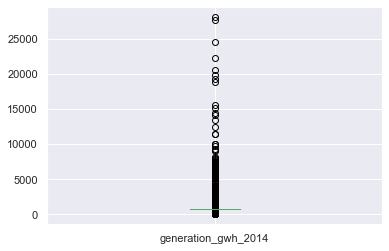

In [60]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

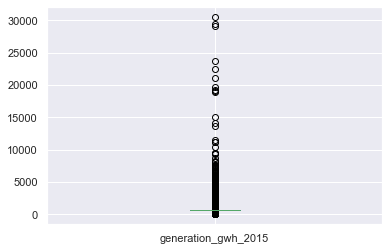

In [61]:
df["generation_gwh_2015"].plot.box()

<AxesSubplot:>

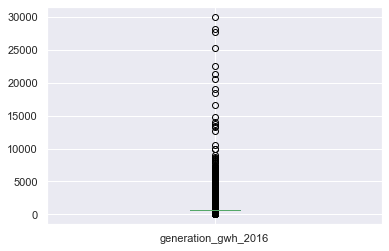

In [62]:
df["generation_gwh_2016"].plot.box()

<AxesSubplot:>

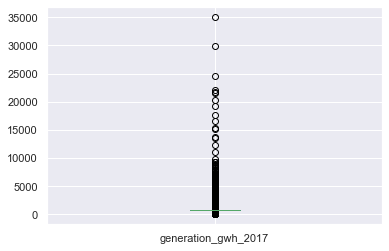

In [63]:
df["generation_gwh_2017"].plot.box()

<AxesSubplot:>

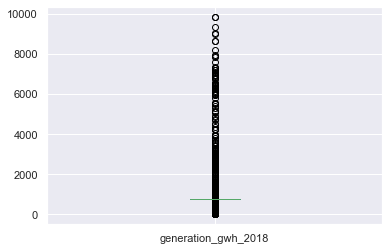

In [89]:
df["generation_gwh_2018"].plot.box()

# 9. Removing Outliers 

In [90]:
# importing outliers libraries 

from scipy.stats import zscore

In [91]:
z= np.abs(zscore(df))
z

array([[0.62096547, 1.14613254, 0.8832816 , ..., 0.29791992, 0.28984966,
        0.30785497],
       [0.39120837, 0.59012382, 0.56618997, ..., 0.29791992, 0.28984966,
        0.30785497],
       [0.53267138, 0.12442421, 1.77954108, ..., 0.29791992, 0.28984966,
        0.30785497],
       ...,
       [0.5656313 , 0.9538839 , 0.34091425, ..., 0.29791992, 0.28984966,
        0.30785497],
       [0.43451337, 0.52239605, 0.76578876, ..., 0.29791992, 0.28984966,
        0.30785497],
       [0.5872838 , 1.8228753 , 0.09839773, ..., 0.29791992, 0.28984966,
        0.30785497]])

In [92]:
threshold= 3 
print(np.where(z>3))

(array([  3,   4,   4,   4,   4,  12,  12,  12,  12,  12,  43,  43,  43,
        43,  43,  56,  57,  60,  60,  60,  74,  74,  74,  77,  92,  92,
       102, 158, 158, 158, 163, 163, 183, 183, 232, 272, 272, 272, 280,
       280, 289, 289, 289, 289, 300, 300, 300, 300, 301, 301, 301, 306,
       310, 323, 323, 323, 323, 340, 351, 351, 351, 351, 351, 353, 353,
       353, 353, 353, 358, 362, 362, 372, 374, 374, 374, 374, 374, 374,
       375, 375, 375, 375, 398, 400, 400, 431, 431, 431, 437, 437, 437,
       437, 437, 453, 454, 454, 456, 462, 503, 503, 503, 503, 503, 506,
       511, 511, 511, 520, 540, 540, 540, 540, 542, 552, 552, 571, 571,
       592, 592, 592, 592, 592, 598, 605, 605, 605, 605, 616, 617, 617,
       617, 617, 617, 623, 625, 625, 625, 625, 648, 652, 661, 661, 661,
       661, 661, 666, 669, 669, 669, 691, 691, 704, 704, 706, 709, 709,
       751, 751, 751, 751, 755, 755, 755, 755, 781, 781, 803, 803, 803,
       806, 806, 806, 808, 809, 809, 809, 809, 809, 809, 827, 8

In [93]:
df=df[(z<3).all(axis=1)]
print(df.shape)
print(df.shape)

(792, 9)
(792, 9)


In [94]:
df.shape

(792, 9)

In [95]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1.0,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7.0,801.123775,711.181225,737.20545,817.97725,751.644375
5,250.0,23.7689,68.6447,1.0,1153.421000,1208.852000,1175.76500,1147.91300,976.655000
6,60.0,10.4547,77.0078,3.0,157.558250,152.195200,61.42135,89.62960,48.327150


# 11. Removing Skewness

In [96]:
df.skew()

capacity_mw            2.269589
latitude              -0.090555
longitude              0.813720
primary_fuel           0.295127
generation_gwh_2014    2.914000
generation_gwh_2015    2.908757
generation_gwh_2016    2.795582
generation_gwh_2017    2.731036
generation_gwh_2018    2.832622
dtype: float64

In [97]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df.drop(['capacity_mw'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [102]:
X=pd.DataFrame(data=x)

# 12. Scalling the data using standard scaller

In [103]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

# 13. VIF calculation

In [104]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [106]:
dfx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [107]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [108]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.034241
1,longitude,1.179362
2,primary_fuel,1.170123
3,generation_gwh_2013,3.514869
4,generation_gwh_2014,5.694017
5,generation_gwh_2015,8.326154
6,generation_gwh_2016,8.715864
7,generation_gwh_2017,8.258208


In [109]:
x=dfx

# 14 . model development

In [110]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 15. Linear Regression

In [112]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 513 The model perform very well
At random State: 513
Training r2_score 29.613533415393334
Testing r2 score  29.571549073464688
At Random state 543 The model perform very well
At random State: 543
Training r2_score 29.44217772677279
Testing r2 score  29.393817293750214


In [113]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 912)

In [114]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.18220554286907054


# 16. cross validation of model 

In [115]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 20.88746657471308 and Accuracy score is 18.220554286907053
At cross fold 3 the Cross Val score is 24.76786437212648 and Accuracy score is 18.220554286907053
At cross fold 4 the Cross Val score is 22.595401343745785 and Accuracy score is 18.220554286907053
At cross fold 5 the Cross Val score is 24.160371953893765 and Accuracy score is 18.220554286907053
At cross fold 6 the Cross Val score is 26.508097308750862 and Accuracy score is 18.220554286907053
At cross fold 7 the Cross Val score is 23.12815437070663 and Accuracy score is 18.220554286907053
At cross fold 8 the Cross Val score is 24.50924757154401 and Accuracy score is 18.220554286907053
At cross fold 9 the Cross Val score is 25.3573878950989 and Accuracy score is 18.220554286907053


In [116]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))


Error:
Mean Absolute Error: 179.34100185847802
Mean Squared Error: 76377.93721599429
Root Mean Square Error: 276.3655861644034


# 17. LASSO

In [118]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 18.424566573352408
Cross val Score : 25.511934722090302


In [119]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 178.9915550487504
Mean Squared Error: 76187.3998814655
Root Mean Square Error: 276.02065118658334


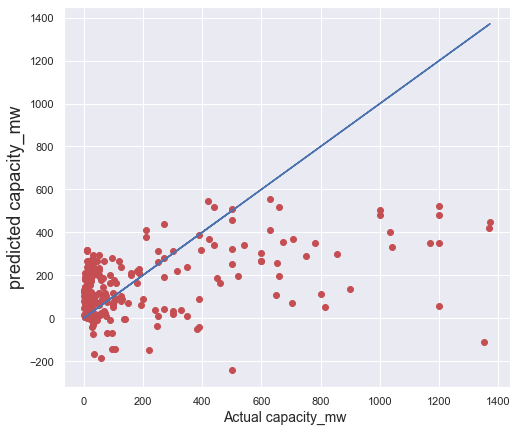

In [120]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 18. Ridge

In [121]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  18.220123913924546
Cross val Score 24.56549481884239


In [122]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 179.3311900577433
Mean Squared Error: 76378.33916296704
Root Mean Square Error: 276.3663133650102


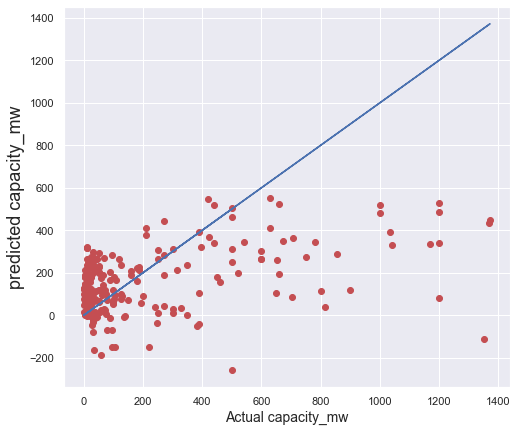

In [123]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 19. Decision Treeregressor

In [124]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 56.53030579309242
Cross Val Score: 46.38453366664315


In [125]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 95.66740126050419
Mean Squared Error: 40598.53360441772
Root Mean Square Error: 201.49077796370165


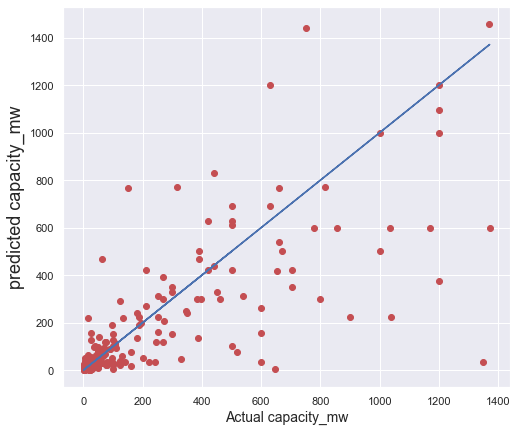

In [126]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 20. Ensamble Technique

In [127]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 66.53436674645272
Cross val Score : 71.24096044408873


In [128]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 87.93490926938259
Mean Squared Error: 31255.23795429322
Root Mean Square Error: 176.7915098478805


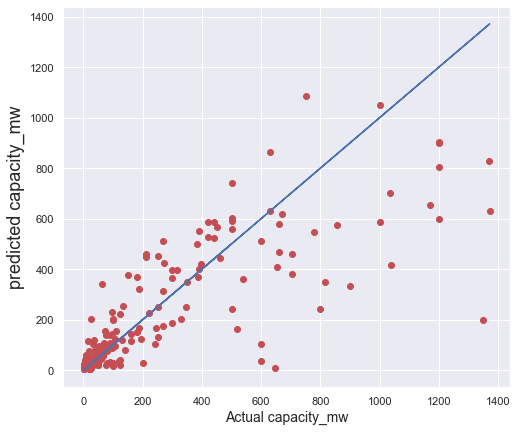

In [129]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 20. Gradient boostigRegressor

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 66.53436674645272
Cross val Score : 68.00120813074905


In [131]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 87.93490926938259
Mean Squared Error: 31255.23795429322
Root Mean Square Error: 176.7915098478805


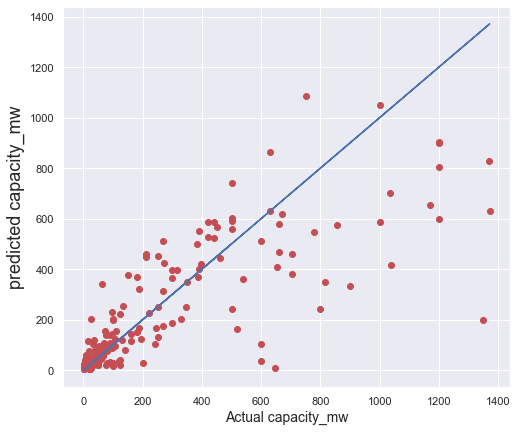

In [132]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 21. hyper tunning parameters

In [134]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
gb=GradientBoostingRegressor()
rfclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [135]:
gb=GradientBoostingRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

gbcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100)

R2 score: 66.53436674645272
Cross val Score : 71.0382304765197


# 22. saving the model

In [136]:
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

In [137]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,500.0,242.562810
1,5.0,14.000667
2,70.0,105.437600
3,22.5,10.724929
4,9.0,21.203000
...,...,...
233,1.0,8.692500
234,390.0,549.825600
235,5.8,8.765000
236,150.0,376.845600


# predict the PRIMARY FUEL

In [139]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1.0,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7.0,801.123775,711.181225,737.20545,817.97725,751.644375
5,250.0,23.7689,68.6447,1.0,1153.421000,1208.852000,1175.76500,1147.91300,976.655000
6,60.0,10.4547,77.0078,3.0,157.558250,152.195200,61.42135,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,5.0,0.000000,0.000000,0.00000,817.97725,0.000000
903,3.0,12.8932,78.1654,6.0,801.123775,711.181225,737.20545,817.97725,751.644375
904,25.5,15.2758,75.5811,7.0,801.123775,711.181225,737.20545,817.97725,751.644375
905,80.0,24.3500,73.7477,1.0,801.123775,711.181225,737.20545,817.97725,751.644375


In [140]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1.0,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7.0,801.123775,711.181225,737.20545,817.97725,751.644375
5,250.0,23.7689,68.6447,1.0,1153.421000,1208.852000,1175.76500,1147.91300,976.655000
6,60.0,10.4547,77.0078,3.0,157.558250,152.195200,61.42135,89.62960,48.327150


In [141]:
# deviding into fetures and target. 
x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']

In [142]:
x.skew()

capacity_mw            2.269589
latitude              -0.090555
longitude              0.813720
generation_gwh_2014    2.914000
generation_gwh_2015    2.908757
generation_gwh_2016    2.795582
generation_gwh_2017    2.731036
generation_gwh_2018    2.832622
dtype: float64

In [143]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')

In [144]:
X2=pd.DataFrame(data=x)

In [145]:
X2

,0,1,2,3,4,5,6,7
0,-1.675739,1.142580,-0.899342,0.083209,0.087416,0.109202,0.126143,0.091333
1,0.412204,0.588871,-0.465895,0.083209,0.087416,0.109202,0.126143,0.091333
2,-0.128661,0.126627,-2.366000,0.083209,0.087416,0.109202,0.126143,0.091333
3,0.954150,0.427641,-2.689281,0.561491,0.733011,0.673717,0.526578,0.381952
4,0.123566,-1.703852,0.206290,-1.333302,-1.176569,-1.612536,-1.465207,-1.664058
...,...,...,...,...,...,...,...,...
787,0.461400,-1.281644,0.352849,-2.579417,-2.489780,-2.431106,0.126143,-2.372417
788,-1.587902,-1.317022,0.495513,0.083209,0.087416,0.109202,0.126143,0.091333
789,-0.384152,-0.937257,-0.180849,0.083209,0.087416,0.109202,0.126143,0.091333
790,0.293144,0.521555,-0.734125,0.083209,0.087416,0.109202,0.126143,0.091333


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [148]:
dfy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [149]:
dfy

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
